In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # графики
from sklearn.metrics import accuracy_score, classification_report, log_loss
from sklearn.model_selection import train_test_split
import torch
import perceptron
import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv("data_training.csv", header=None)
tagter = np.array([1 if i == 'M' else 0 for i in data[1]])
data = data.drop([0, 1], axis=1)
data = StandardScaler().fit_transform(data)

In [3]:
X_train, X_test, y_train, y_test = train_test_split(data, tagter, test_size=0.33, random_state=42)

In [4]:
net = perceptron.Net(2, 2, debug=True, lr=1, min_err=0.1, n_epochs=10000)
net.fit(X_train, y_train, X_test, y_test)

epoch 1/10000 - loss: 0.6573 - valid_loss: 0.6582 - accuracy: 0.6364
epoch 2/10000 - loss: 0.6556 - valid_loss: 0.6579 - accuracy: 0.6364
epoch 3/10000 - loss: 0.6551 - valid_loss: 0.6576 - accuracy: 0.6364
epoch 4/10000 - loss: 0.6548 - valid_loss: 0.6572 - accuracy: 0.6364
epoch 5/10000 - loss: 0.6544 - valid_loss: 0.6566 - accuracy: 0.6364
epoch 6/10000 - loss: 0.6539 - valid_loss: 0.6559 - accuracy: 0.6364
epoch 7/10000 - loss: 0.6532 - valid_loss: 0.6548 - accuracy: 0.6364
epoch 8/10000 - loss: 0.6522 - valid_loss: 0.6534 - accuracy: 0.6364
epoch 9/10000 - loss: 0.6508 - valid_loss: 0.6514 - accuracy: 0.6364
epoch 10/10000 - loss: 0.6489 - valid_loss: 0.6486 - accuracy: 0.6364
epoch 11/10000 - loss: 0.6463 - valid_loss: 0.6449 - accuracy: 0.6364
epoch 12/10000 - loss: 0.6428 - valid_loss: 0.6397 - accuracy: 0.6364
epoch 13/10000 - loss: 0.6379 - valid_loss: 0.6329 - accuracy: 0.6364
epoch 14/10000 - loss: 0.6317 - valid_loss: 0.625 - accuracy: 0.6364
epoch 15/10000 - loss: 0.6241 

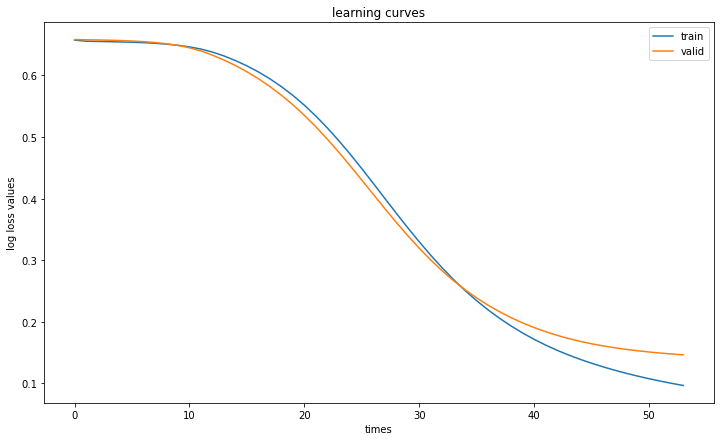

In [5]:
def plot_mas_logloss(net):
    plt.figure(figsize=(12, 7))
    plt.subplot(1, 1, 1)
    plt.plot(net.mas_logloss)
    plt.subplot(1, 1, 1)
    plt.plot(net.mas_valid_logloss) 
    plt.title('learning curves')
    plt.legend(['train', 'valid'])
    plt.xlabel('times')
    plt.ylabel('log loss values')
    plt.show()
plot_mas_logloss(net)

In [6]:
net1 = perceptron.Net(2, 2, lr=1, min_err=0.1, n_epochs=10000, random_state=21)
net1.fit(X_train, y_train)
net2 = perceptron.Net(2, 2, lr=1, min_err=0.1, n_epochs=10000, random_state=42)
net2.fit(X_train, y_train)
net3 = perceptron.Net(2, 2, lr=1, min_err=0.1, n_epochs=10000, random_state=69)
net3.fit(X_train, y_train)

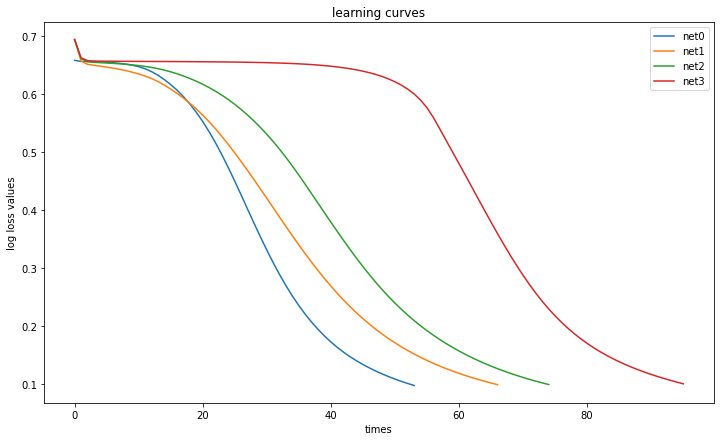

In [7]:
def plot_several_mas_logloss(net1):
    plt.figure(figsize=(12, 7))
    plt.subplot()
    for net_los in net1.plot_any_loss:
        plt.plot(net_los)
    legends = [f"net{i}"for i in range(len(net1.plot_any_loss))]
    plt.legend(legends)
    plt.title('learning curves')
    plt.xlabel('times')
    plt.ylabel('log loss values')
    plt.show()
plot_several_mas_logloss(net1)

In [8]:
pred = net1.predict(X_test)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98        89
           1       1.00      0.94      0.97        52

    accuracy                           0.98       141
   macro avg       0.98      0.97      0.98       141
weighted avg       0.98      0.98      0.98       141



In [9]:
accuracy_score(y_test, pred)

0.9787234042553191

In [10]:
net1.dump_net()

In [11]:
new_net = net1.load_net()

In [12]:
print(classification_report(tagter, new_net.predict(data)))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       271
           1       1.00      0.97      0.99       156

    accuracy                           0.99       427
   macro avg       0.99      0.99      0.99       427
weighted avg       0.99      0.99      0.99       427

